# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [2]:

# 데이터셋 종류 : 
data = load_breast_cancer()

In [3]:
input = data.data
output = data.target

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [6]:
print(x_train[0])
print(y_train[0])

#input 30개 (속성이 30개)
#y의 class는 2개 (양성과 음성)

tensor([1.1620e+01, 1.8180e+01, 7.6380e+01, 4.0880e+02, 1.1750e-01, 1.4830e-01,
        1.0200e-01, 5.5640e-02, 1.9570e-01, 7.2550e-02, 4.1010e-01, 1.7400e+00,
        3.0270e+00, 2.7850e+01, 1.4590e-02, 3.2060e-02, 4.9610e-02, 1.8410e-02,
        1.8070e-02, 5.2170e-03, 1.3360e+01, 2.5400e+01, 8.8140e+01, 5.2810e+02,
        1.7800e-01, 2.8780e-01, 3.1860e-01, 1.4160e-01, 2.6600e-01, 9.2700e-02])
tensor(1)


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [7]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [8]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [14]:
class relu(nn.Module):
    def __init__(self):
        super(relu, self).__init__()

    def forward(self, x):
        return torch.max(torch.zeros_like(x), x)

In [15]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(30,20, bias=True), 
          relu(),
          nn.Linear(20,10, bias=True),
          relu(),
          nn.Linear(10,2, bias=True), 
          nn.Softmax(dim=1)
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [22]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(30, 20, bias=True), # input_layer = 30, hidden_layer1 = 398 
          relu(),
        nn.BatchNorm1d(20)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(20,10, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        relu()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(10,2, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        relu()
    )


  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [16]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.kaiming_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

# 학습률 조정

In [17]:
loss_fn  = nn.CrossEntropyLoss().to(device)

lrs = [0.001, 0.005, 0.01, 0.05, 0.1]

In [23]:
losses = {}
accuracy = {}
for lr in lrs:
    model = Model().to(device)
    model.apply(init_weights)
    optimizer = optim.Adam(model.parameters(), lr)

    losses[lr] = []

    for epoch in range(100):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses[lr].append(loss.detach().numpy())

    with torch.no_grad():
        model = model.to('cpu')
        y_pred = model(x_test)
        y_pred = y_pred.detach().numpy()
        predicted = np.argmax(y_pred, axis =1)
        accuracy[str(lr)] = (accuracy_score(predicted, y_test))

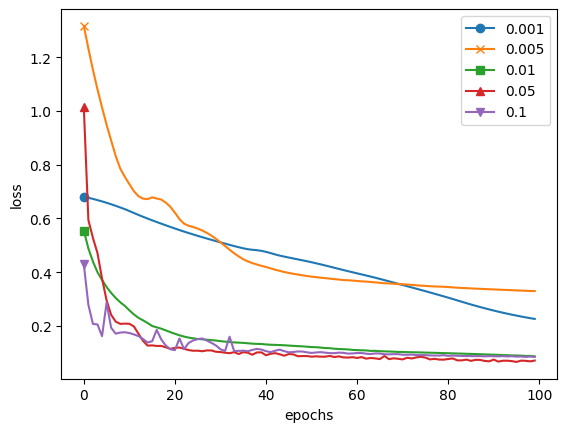

In [24]:
markers = {"0.001": "o", "0.005": "x", "0.01": "s", "0.05": "^", "0.1" : "v"}

x = np.arange(100)
for lr in lrs:
    plt.plot(x, losses[lr], marker=markers[str(lr)], markevery=100, label=str(lr))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [25]:
acc1 = pd.DataFrame([accuracy.values()], columns=accuracy.keys(), index=['accuracy'])
print(acc1)

             0.001     0.005      0.01      0.05       0.1
accuracy  0.918129  0.900585  0.953216  0.953216  0.953216


# optimizer 조정

In [26]:
loss_fn  = nn.CrossEntropyLoss().to(device)

models = {}
models['Adam'] = Model().to(device).apply(init_weights)
models['Adagrad'] = Model().to(device).apply(init_weights)
models['SGD'] = Model().to(device).apply(init_weights)

optimizers = {}
optimizers['Adam'] = optim.Adam(models['Adam'].parameters(), lr=lr)
optimizers['Adagrad'] = optim.Adagrad(models['Adagrad'].parameters(), lr=lr)
optimizers['SGD'] = optim.SGD(models['SGD'].parameters(), lr=lr)

In [27]:
lr = 0.01
losses = {}

for key in optimizers.keys():
    losses[key] = []

epochs = 100
for epoch in range(epochs):
    for key in optimizers.keys():
        optimizers[key].zero_grad()
        y_pred = models[key](x_train)

        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizers[key].step()
        losses[key].append(loss.item())

accuracy = {}
for key in optimizers.keys():
    with torch.no_grad():
        models[key] = models[key].to('cpu')
        y_pred = models[key](x_test)
        y_pred = y_pred.detach().numpy()
        predicted = np.argmax(y_pred, axis =1)
        accuracy[key] = (accuracy_score(predicted, y_test))

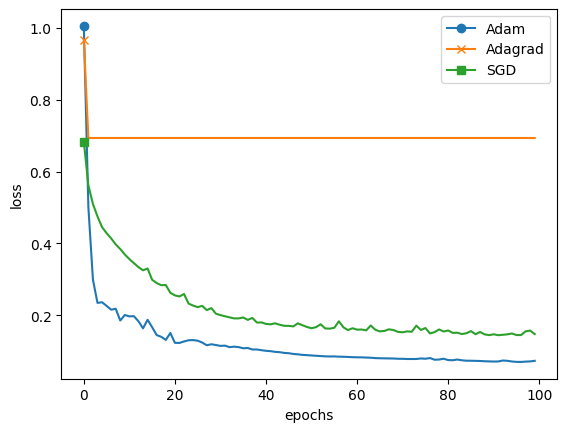

In [28]:
markers = {"Adam": "o", "Adagrad": "x", "SGD": "s"}
x = np.arange(epochs)
for key in optimizers.keys():
    plt.plot(x, losses[key], marker=markers[key], markevery=100, label=key)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [29]:
acc1 = pd.DataFrame([accuracy.values()], columns=accuracy.keys(), index=['accuracy'])
print(acc1)

             Adam   Adagrad       SGD
accuracy  0.94152  0.374269  0.912281


In [ ]:
# Accuracy: optimizer=Adam, lr=0.01, 0.05, 0.1일 때 최댓값 0.953216

# < 3주차 과제 2 : CNN 맛보기>

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
train_dataset.data.shape

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은?  x`

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))      #   (28-4)/2 = 12
    x = F.relu(self.mp(self.conv2(x)))      #   (12-4)/2 = 4
    x = x.view(in_size, -1)                 #   4 * 4 * 20 = 320 
    x = self.fc(x)
    return F.log_softmax(x, dim=1)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)     
    # toTensor 해놓고 왜 Variable을 씌우는가? : tensor gradient 추적 기능이 없을 때의 코드
    
      optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)       # volatile -> torch.no_grad()로 대체 
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인! => same
        # size_avarage -> reduction='sum'
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 2):
    train(epoch)
    test()